In [1]:


#Jin Chul Cha, jcc147


import numpy as np
import pandas as pd
doggy = pd.read_csv("dogs.csv", index_col="OwnerZip")
#doggy.head()

# Look at the first 10 rows
doggy.head(10)




,LicenseType,Breed,Color,DogName,ExpYear,ValidDate
OwnerZip,,,,,,
15137,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,2099,2005-01-31T00:00:00
15129,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,2099,2004-06-21T00:00:00
15129,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,2099,2006-01-20T00:00:00
15140,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,2099,2005-07-18T00:00:00
15238,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,2099,2004-02-25T00:00:00
15037,Dog Lifetime Male,ENG SETTER,WHITE/BLACK/BROWN,CODY,2099,2006-02-24T00:00:00
15037,Dog Lifetime Male,ENG SETTER,WHITE/BLACK/BROWN,CHARLIE,2099,2006-02-24T00:00:00
15037,Dog Lifetime Neutered Male,DOBERMAN PINSCHER,BLACK/BROWN,COLT,2099,2006-02-24T00:00:00
15037,Dog Lifetime Spayed Female,MIN PINSCHER,BLACK/BROWN,CANDY,2099,2006-02-24T00:00:00


In [2]:
#measured how many dogs per zip code

df = pd.read_csv("dogs.csv", index_col=0)

df["OwnerZip"].value_counts()



15237    2418
15236    1701
15108    1441
15102    1397
15044    1388
         ... 
47909       1
16342       1
15089       1
15601       1
15091       1
Name: OwnerZip, Length: 130, dtype: int64

In [3]:
#df.plot()
#df.sum().plot(kind= index_col=0)

"""
df["OwnerZip"].value_counts().sort_index().plot.pie(y='Dog Frequency', 
                                                  subplots=False, 
                                                  figsize=(80, 40))
"""

'\ndf["OwnerZip"].value_counts().sort_index().plot.pie(y=\'Dog Frequency\', \n                                                  subplots=False, \n                                                  figsize=(80, 40))\n'

In [4]:
#df.nlargest(20, 'a')

top20 = pd.read_csv("dogs.csv", index_col=0)
top20["OwnerZip"].value_counts().head(20)






15237    2418
15236    1701
15108    1441
15102    1397
15044    1388
15235    1378
15239    1326
15122    1298
15101    1282
15227    1254
15146    1211
15143    1204
15090    1170
15037     954
15025     911
15241     873
15147     834
15229     810
15065     759
15120     749
Name: OwnerZip, dtype: int64

In [5]:
# import dataset
import pandas as pd
import geopandas
%matplotlib inline

# import dataset
steps = pd.read_csv("steps.csv")
# filter to important info


num_steps = steps.groupby("neighborhood").sum()['number_of_steps']
#num_steps.sort_values(ascending=False).head(50)
# num_steps.sort_values(ascending=False)

num_steps.index.unique()





Index(['Allegheny Center', 'Allentown', 'Arlington', 'Banksville',
       'Bedford Dwellings', 'Beechview', 'Beltzhoover', 'Bloomfield', 'Bluff',
       'Bon Air', 'Brighton Heights', 'Brookline', 'California-Kirkbride',
       'Carrick', 'Central Lawrenceville', 'Central Northside',
       'Central Oakland', 'Chartiers City', 'Crafton Heights',
       'Crawford-Roberts', 'Duquesne Heights', 'East Allegheny',
       'East Carnegie', 'East Hills', 'Elliott', 'Esplen', 'Fineview',
       'Garfield', 'Glen Hazel', 'Greenfield', 'Hazelwood', 'Highland Park',
       'Homewood North', 'Knoxville', 'Larimer', 'Lincoln Place',
       'Lincoln-Lemington-Belmar', 'Marshall-Shadeland', 'Middle Hill',
       'Morningside', 'Mount Oliver Borough', 'Mount Washington', 'Mt. Oliver',
       'North Oakland', 'Oakwood', 'Overbrook', 'Perry North', 'Perry South',
       'Point Breeze', 'Polish Hill', 'Ridgemont', 'Shadyside', 'Sheraden',
       'South Oakland', 'South Side Flats', 'South Side Slopes',
  

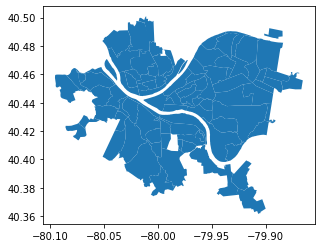

In [6]:

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [7]:
#top 20 dogs per zip code

doggos = pd.read_csv("dogs.csv", index_col=0)

doggsZips = pd.DataFrame(doggos["OwnerZip"].value_counts()) # top 50 neighborhood with the most dogs
doggsZips.head()


,OwnerZip
15237,2418
15236,1701
15108,1441
15102,1397
15044,1388


In [9]:
#parks = pd.read_csv("parks.csv", index_col=0)
# import dataset
import pandas as pd
import geopandas as gpd 
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
zips = gpd.read_file("Neighborhoods/Allegheny_County_Zip_Code_Boundaries.shp")
#finding zipcode to neighboorhood
def zip_to_neigborhood(z):
    try:
        q = zips["ZIP"] == z
        this_zip = zips[q].iloc[0]
        for i, neighborhood in neighborhoods.iterrows():
            if this_zip["geometry"].intersects(neighborhood["geometry"]):
                return neighborhood["hood"]
    except:
        return None
#q is a query string that filters the zip code we are looking for
# ZIP gets the zipcode from the data we are looking for 
# if a zipcode is OUTSIDE of pittsburgh, ignores it

#nh neighborhood string
doggsZips["nh"] = [zip_to_neigborhood(str(x)) for x in doggsZips.index.values]

#doggsZips[doggsZips["nh"].notnull()]

doggsZips = doggsZips[doggsZips["nh"].notnull()]
dogNeighborhoods = doggsZips.groupby("nh")["OwnerZip"].sum().sort_values(ascending=False)
n2 = neighborhoods.merge(dogNeighborhoods, left_on="hood", right_on="nh")
#HEAT map below: 
n2.plot(column="OwnerZip", legend=True) # plot the geopandas dataframe



nh
Hays                        3748
Lincoln-Lemington-Belmar    3118
Carrick                     1254
Westwood                     775
Brighton Heights             665
East Carnegie                616
East Hills                   585
Windgap                      535
Troy Hill                    513
Brookline                    456
Mount Washington             373
Squirrel Hill South          313
Spring Hill-City View        275
Beltzhoover                  127
Hazelwood                     25
Name: OwnerZip, dtype: int64

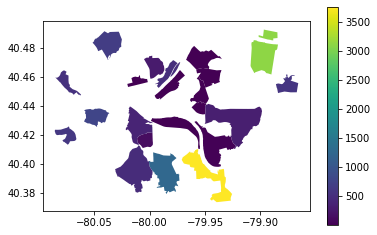

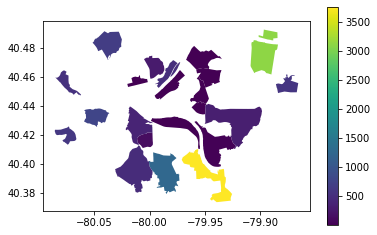

In [10]:
dogNeighborhoods.head(15)

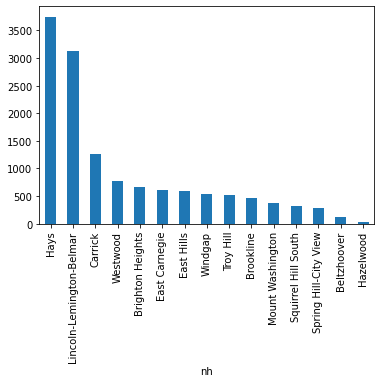

In [11]:
dogNeighborhoods.head(15).plot(kind='bar')

Data analysis: 

According to the data set, nearly all neighborhoods have some dog owners; while the number varies widely, most neighborhoods have at least 50 days, while on the opposite extreme end, neighborhoods can have up to 500 to over 3500 dogs. The dog ownership data set was used along shide the Allegheny County Zip Code Boundaries shape file (https://data.wprdc.org/dataset/allegheny-county-zip-code-boundaries2) to associate each zip code to their corresponding neighborhood. According to the bar chart and heap map above, Hays, Lincoln-Lemington-Belmar, Carrick, Westwood, and etc are the top neighborhoods with most dogs registered in the neighborhood. The bar chart and the heat map was shorten to 15 neighborhoods for better visualization. 
